In [21]:
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [106]:
data_path = './data/'
df_train = pd.read_csv(data_path + 'train.csv')

In [95]:
print(df_train.shape)
df_train.head()
# Pclass: 艙等 
# SibSp: 船上的兄弟姊妹或配偶
# Parch: 船上的父母或孩子
# Ticket: 票號
# Fare: 票錢
# Cabin: 住房號碼
# Embarked: 登船港口

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df_train.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

(array([], dtype=int64), array([], dtype=int64))


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

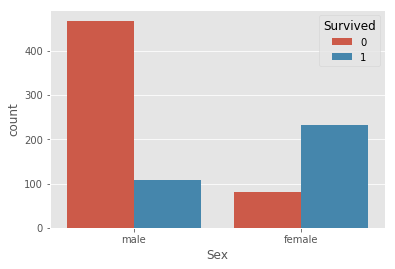

In [97]:
# 觀察性別跟存活率
print(np.where(pd.isnull(df_train[['Sex']])))
sns.countplot(df_train['Sex'], hue=df_train['Survived'])
df_train.groupby(['Sex', 'Survived'])['PassengerId'].count()

(array([], dtype=int64), array([], dtype=int64))


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

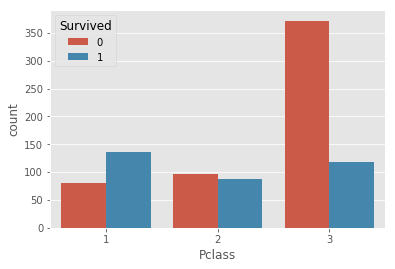

In [98]:
# 觀察艙等跟存活率
print(np.where(pd.isnull(df_train[['Pclass']])))
sns.countplot(df_train['Pclass'], hue=df_train['Survived'])
df_train.groupby(['Pclass', 'Survived'])['PassengerId'].count()

(array([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  22,  24,  25,  26,  28,  29,  30,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  53,  56,  57,  58,  59,  60,  63,  64,  65,
        67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  93,  94,  95,
        98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112,
       113, 114, 115, 116, 117, 119, 120, 121, 122, 125, 126, 127, 129,
       130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 143, 144, 145,
       146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 175, 176,
       178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 190, 191, 192,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 210,
       211, 212, 213, 214, 216, 217, 219, 220, 221, 222, 223, 2

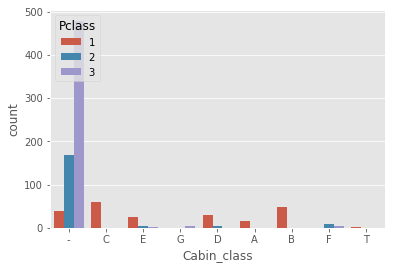

In [100]:
# 觀察Cabin，並只取第一個字母
print(np.where(df_train[['Cabin']].isna()))
df_train['Cabin'].fillna("-1", inplace=True)
df_train['Cabin_class'] = df_train['Cabin'].str.get(0)
df_train.groupby(['Cabin_class'])['PassengerId'].count()
sns.countplot(df_train['Cabin_class'], hue=df_train['Pclass'])

(array([ 61, 829], dtype=int64), array([0, 0], dtype=int64))


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

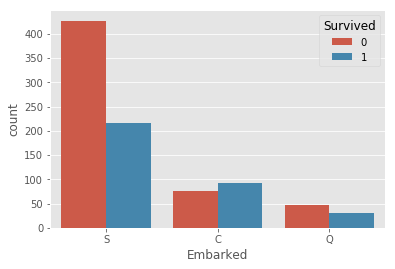

In [99]:
# 觀察登船港口跟存活率 有缺失值
print(np.where(pd.isnull(df_train[['Embarked']])))
sns.countplot(df_train['Embarked'], hue=df_train['Survived'])
df_train.groupby(['Embarked', 'Survived'])['PassengerId'].count()

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


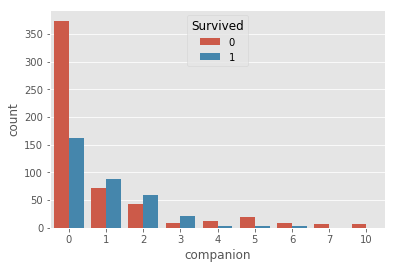

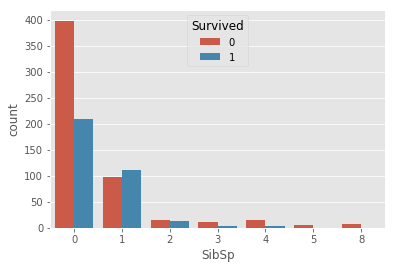

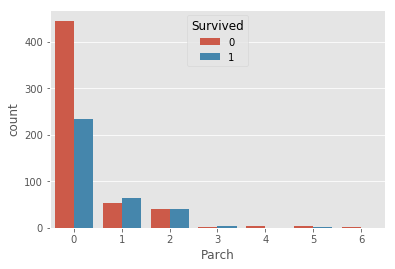

In [102]:
# 觀察一起搭船的人跟生存率的關係
print(np.where(df_train[['SibSp']].isna()))
print(np.where(df_train[['Parch']].isna()))
df_train['companion'] = df_train['SibSp'] + df_train['Parch']
sns.countplot(df_train['companion'], hue=df_train['Survived'])
plt.show()
sns.countplot(df_train['SibSp'], hue=df_train['Survived'])
plt.show()
sns.countplot(df_train['Parch'], hue=df_train['Survived'])
plt.show()

(array([], dtype=int64), array([], dtype=int64))


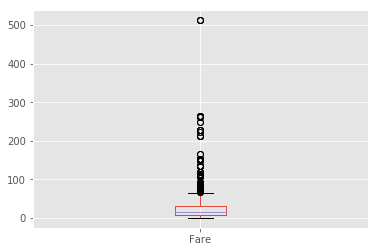

In [107]:
# 票錢有離群值
print(np.where(df_train[['Fare']].isna()))
df_train[['Fare']].boxplot()

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

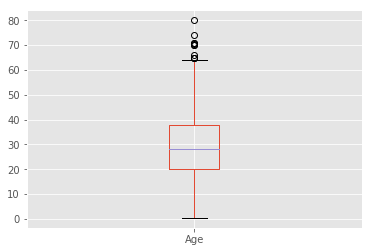

In [72]:
# 年齡有缺失值
df_train[['Age']].boxplot()
np.where(pd.isnull(df_train[['Age']]))

(array([], dtype=int64), array([], dtype=int64))
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


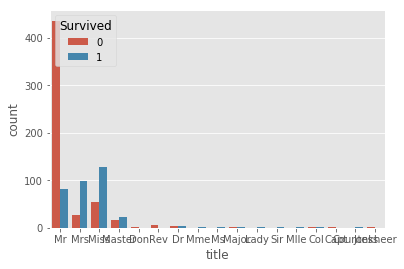

In [105]:
# 抓取名字裡面的稱謂和存活率的關係
print(np.where(df_train[['Name']].isna()))
df_train['title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_train['title'].unique())
sns.countplot(df_train['title'], hue=df_train['Survived'])